In [1]:
import tables, glob, os, time, sys
import numpy as np 
import matplotlib.pyplot as plt 

## Looking at photon paths

In [2]:
from stl import mesh
from mpl_toolkits import mplot3d

In [3]:
def readPhotonPaths(filename):

    f = open(filename, "r")
    paths_runs = []
    paths = []
    save = -1

    lst = f.read().splitlines()
    f.close()

    num_lines = len(lst)
    
    #get the geometry shift - should be the 3rd line down
    centerSh = [float(x) for x in lst[2].split(', ')[:-1]]
    print("Shifting geometry by: ", centerSh)

    for i in range(5, num_lines, 4):
        
        if '*' in lst[i]:
            print("New run detected", len(paths), len(paths_runs))
            paths_runs.append(paths)
            paths = []
            
        else:

            X = [float(x) for x in lst[i+1].split(', ')[:-1]]
            Y = [float(x) for x in lst[i+2].split(', ')[:-1]]
            Z = [float(x) for x in lst[i+3].split(', ')[:-1]]

            paths.append([X, Y, Z])
            
    paths_runs.append(paths)
    
    print("Total of {} runs saved.".format(len(paths_runs)))
    return paths_runs, centerSh

In [10]:
# paths_runs, centerShift = readPhotonPaths("photonPath_PMTFullAbs.txt")
# paths_runs, centerShift = readPhotonPaths("photonPath_Cher1.txt")
paths_runs, centerShift = readPhotonPaths("photonPath_Cher2.txt")

Shifting geometry by:  [-6.351859092712402, -624.41845703125, 6.573245048522949]
Total of 1 runs saved.


In [11]:
#STL files for plotting

# centerShift = [6.351859, 624.41846, -6.573245] #shift with OC as center

# def setMesh(shift=centerShift):
#     #watertank
WT_mesh = mesh.Mesh.from_file('CAD/ODModel_SimulationModelUpdatedCryostat v14_simplified_WT_1_WaterTank_simplified_WT.STL')
WT_mesh.rotate([-1, 0.0, 0.0], np.radians(90))

#outer cyrostat
OC_mesh = mesh.Mesh.from_file('CAD/ODModel_OuterCyrostat.STL')
OC_mesh.rotate([-1, 0.0, 0.0], np.radians(90))

#PMT glass surface
PMT_mesh = mesh.Mesh.from_file('CAD/ODModel_PMT_Glassware_Component2Body1_Component2.STL')
PMT_mesh.rotate([-1, 0.0, 0.0], np.radians(90))

#PMT Steel connecting parts
PMT1_mesh = mesh.Mesh.from_file('CAD/ODModel_PMT_MetalConnection_Component3Body1_Component3.STL')
PMT2_mesh = mesh.Mesh.from_file('CAD/ODModel_PMT_MetalConnection_Component4Body1_Component4.STL')
# PMT3_mesh = mesh.Mesh.from_file('CAD/ODModel_PMT_MetalConnection_Component6Body1_Component6.STL') #metal prongs
PMTcon_mesh = mesh.Mesh(np.concatenate([m.data for m in [PMT1_mesh, PMT2_mesh]] ))
PMTcon_mesh.rotate([-1, 0.0, 0.0], np.radians(90))

listofParts = [WT_mesh, OC_mesh, PMT_mesh, PMTcon_mesh]

# if shift!=None:
# print("shifting")
for part in listofParts:
    part.x += centerShift[0]
    part.y += centerShift[2]
    part.z += centerShift[1]

colors = ['black', 'black', 'darkred', 'grey']
alpha = [0.05, 0.1, 0.1, 0.1]
facecolor = [None, 'yellow', "blue", 'grey']

"""
Function to graph only wanted part of the geometry, with placement and coloring 
already configured.

parts - list of parts to graph, default is 'all' which graphs all parts, otherwise choose out
    of: ['WT', 'OC', 'PMTGlass', 'PMTconnect']
"""
def addGeometry(ax, parts='all'):

    if parts=='all':
        plotPart = np.arange(len(listofParts))
    else:
        plotPart = []
        for p in parts:
            if p=='WT':
                plotPart.append(0)
            elif p=='OC':
                plotPart.append(1)
            elif p=='PMTGlass':
                plotPart.append(2)
            elif p=='PMTconnect':
                plotPart.append(3)
#             elif p=='support':
#                 plotPart.append(4)
                
    for i in plotPart:
            
        geometryPart = mplot3d.art3d.Line3DCollection(listofParts[i].vectors, linewidths=0.2, alpha=alpha[i])
        geometryPart.set_edgecolor(colors[0])
        geometryPart.set_facecolor(facecolor[i])
        ax.add_collection3d(geometryPart)

In [12]:
print(len(paths_runs[0]))

1000


859.4083251953125 841.5078125 -4396.72998046875
2935.54248046875 2748.70654296875 -7483.50927734375
3.4593281745910645 12.721991539001465 -3087.35498046875
424.0864562988281 -1167.5540771484375 -4439.50048828125
2191.102783203125 -1553.429443359375 -5988.32568359375
-2176.93212890625 3392.599853515625 -7483.509765625
424.4206848144531 -1013.1406860351562 -4225.3837890625
1216.5145263671875 -3024.92724609375 -6651.77685546875
15.359698295593262 3936.708984375 -7419.80224609375
-186.6397247314453 -588.1944580078125 -3747.444580078125
-2576.8271484375 3007.595458984375 -7483.51025390625
532.356201171875 2969.33935546875 -6396.31787109375
257.46258544921875 -872.7717895507812 -4015.100341796875
-1984.7252197265625 3417.92626953125 -7483.50927734375
100.68824005126953 17.10480499267578 -3130.074462890625
-1013.5492553710938 245.8250274658203 -4193.61083984375
-20.34518051147461 91.42937469482422 -3137.104736328125
-3079.469970703125 1240.630126953125 -6697.005859375
-3745.7294921875 1297.26

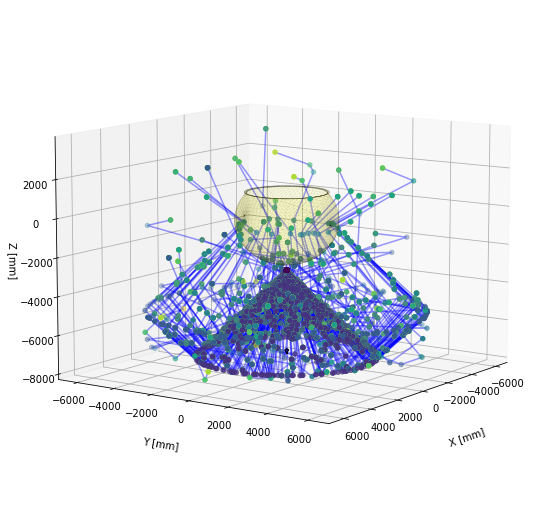

In [16]:
paths = paths_runs[0]

fig = plt.figure(figsize=(7,7))
axes = mplot3d.Axes3D(fig)

for i in range(len(paths)):
    direction = np.arange(len(paths[i][0]))#, len(paths[i][0]))

    axes.plot3D(paths[i][0], paths[i][1], paths[i][2], 'blue', alpha=0.4)
    p = axes.scatter3D(paths[i][0], paths[i][1], paths[i][2], c=direction, cmap='viridis') #, vmin=0, vmax=ELs_max)
    
#     print(paths[i][0][0], paths[i][1][0], paths[i][2][0])    
#     print(paths[i][0][1], paths[i][1][1], paths[i][2][1])    

    
addGeometry(axes, parts=['PMTconnect','PMTGlass', 'OC'])  #'WT' ,

# axes.set_xlim3d(-300, 300)
# axes.set_ylim3d(-300, 300)
# axes.set_zlim3d(-3100, -2930)

# axes.set_xlim3d(-6000, 6000)
# axes.set_ylim3d(-6000, 6000)
# axes.set_zlim3d(-7800, +6730)

axes.set_xlabel("X [mm]")
axes.set_ylabel("Y [mm]")
axes.set_zlabel("Z [mm]")
axes.xaxis.labelpad=20
axes.yaxis.labelpad=15
# axes.zaxis.labelpad=15

# axes.legend()

# fig.colorbar(p, label="Step Number", shrink=0.8)

#change angle of view - (elevation, azimuth) angles in degrees
# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
axes.view_init(10, 35)

# 0, 90 - XZ plane; 90, 90 - top view

plt.show()

# PMT_MetalConnection PMT_Glassware

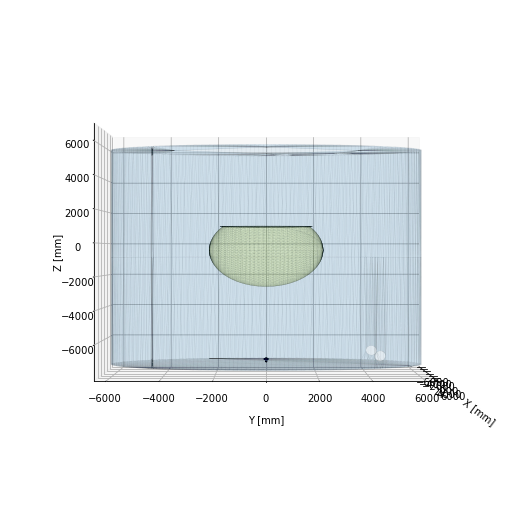

In [8]:
fig = plt.figure(figsize=(7,7))
axes = mplot3d.Axes3D(fig)
   
addGeometry(axes)#, parts=['PMTconnect','PMTGlass', 'WT']) 

# axes.set_xlim3d(-100, 100)
# axes.set_ylim3d(-100, 100)
# axes.set_zlim3d(-8000, -6730)

axes.set_xlim3d(-6200, 6200)
axes.set_ylim3d(-6200, 6200)
axes.set_zlim3d(-7800, +6730)

axes.set_xlabel("X [mm]")
axes.set_ylabel("Y [mm]")
axes.set_zlabel("Z [mm]")
axes.xaxis.labelpad=20
axes.yaxis.labelpad=15

#change angle of view - (elevation, azimuth) angles in degrees
# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
axes.view_init(0, 0)

# 0, 90 - XZ plane; 90, 90 - top view

plt.show()

In [9]:
X = 1
Y = 2
Z = 3

Spot = '4,5,6'

Spot = np.array(Spot.split(','), dtype=np.float)


GenPos = np.array([Spot])

print(type(GenPos[0]))

<class 'numpy.ndarray'>
